In [6]:
%cd drive/MyDrive/multimedia/hw2

/content/drive/MyDrive/multimedia/hw2


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import Dither

<div dir="rtl">
با سلام، من از پکیج PyDIther برای تک بیتی کردن تصویر لوگو استفاده کردم، به کمک دستور زیر می‌توانید این پکیج را نصب نمائید.
<div>

In [5]:
!pip install PyDither

     |████████████████████████████████| 14.6 MB 68 kB/s 
  Created wheel for PyDither: filename=PyDither-0.0.1-py3-none-any.whl size=2398 sha256=70cf15c48ba0f3818c67693870df6ed4311a33c77e425cb5560dc4b4eed829ce
  Stored in directory: /root/.cache/pip/wheels/62/82/07/f3d26a99405f381236a889647bbfa4afeb0f31a433e9f59012
Successfully built PyDither
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.19.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Q1

<div dir="rtl">
تابع زیر هیستوگرام تصویر را محاسبه می‌کند.
<div>

In [ ]:
def imhist(im):
  # calculates normalized histogram of an image
  m, n = im.shape
  h = [0.0] * 256
  for i in range(m):
    for j in range(n):
      h[im[i, j]]+=1
  return np.array(h)/(m*n)
  # return np.array(h)

<div dir="rtl">
این تابع جمع تجمعی عناصر یک آرایه را محاسبه می‌کند.
<div>

In [ ]:
def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

<div dir="rtl">
تابع زیر با استفاده از جمع تجمعی هیستوگرام ابتدا CDF تصویر را پیدا می‌کند و در نهایت نمودارهای CDF و Histogram تصویر را میکشد.
<div>

In [ ]:
def hist_cdf(image):
  hist = imhist(image)
  cdf = cumsum(hist)
  fig = plt.figure(figsize = (8, 8))
  fig.add_subplot(2, 2, 1)
  plt.title("Histogram")
  plt.plot(hist)
  fig.add_subplot(2, 2, 2)
  plt.title("CDF")
  plt.plot(cdf)

<div dir="rtl">
اجرای تابع مربوط به سوال یک
<div>

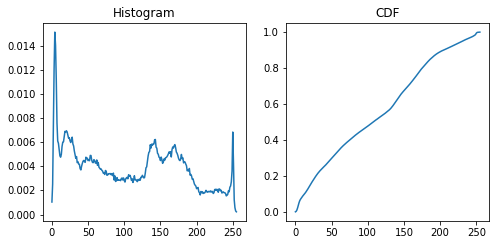

In [ ]:
img = plt.imread('Hi.tif')
hist_cdf(img)

# Q2

<div dir="rtl">
در این تابع پس از بدست آوردن هیستوگرام تصویر، CDF تصویر محاسبه می‌شود و از آنجا که مقادیر پیکسلها بین ۰ و ۲۵۵ بوده CDF را در ۲۵۵ ضرب میکنیم و با توجه به CDF تصویر بهبود یافته را ساخته و به همراه هیستوگرام تصویر جدید و تصویر اصلی و خود تصویر اصلی نمایش میدهیم.
<div>

In [ ]:
def hw2_histeq(image):
  hist = imhist(image)
  cdf = np.array(cumsum(hist))
  new_level = np.uint8(255 * cdf)
  Y = np.zeros((image.shape[0], image.shape[1]))
  for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
      Y[i, j] = int(new_level[image[i, j]])
  Y = Y.astype('uint8')
  new_hist = imhist(Y)
  fig = plt.figure(figsize = (8, 8))
  fig.add_subplot(2, 2, 1)
  plt.title("Original image")
  plt.imshow(image, cmap='gray')
  fig.add_subplot(2, 2, 2)
  plt.title("Original Histogram")
  plt.plot(hist)
  fig.add_subplot(2, 2, 3)
  plt.title("Transformed image")
  plt.imshow(Y, cmap='gray')
  fig.add_subplot(2, 2, 4)
  plt.title("New histogram")
  plt.plot(new_hist)

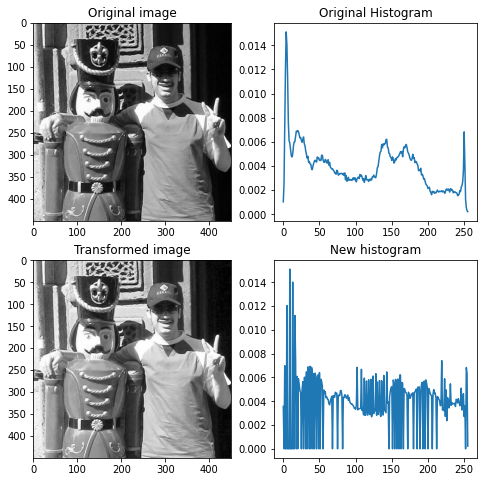

In [ ]:
img = plt.imread('Hi.tif')
hw2_histeq(img)

# Q3

<div dir="rtl">
اگر ابعاد تصویر به گونه ای نباشد که بتوان پنجره‌های مناسبی از آن در نظر گرفت، با استفاده از duplicate padding ابعاد تصویر را به گونه ی مناسب تنظیم می‌کنیم.
<div>

In [8]:
def replicate_padding(arr):
  new_pad_shape = tuple(np.array(arr.shape) + 2)
  padded_array = np.zeros(new_pad_shape) #create an array of zeros with new dimensions
  
  # perform replication
  padded_array[1:-1,1:-1] = arr        # result will be zero-pad
  padded_array[0,1:-1] = arr[0]        # perform edge pad for top row
  padded_array[-1, 1:-1] = arr[-1]     # edge pad for bottom row
  padded_array.T[0, 1:-1] = arr.T[0]   # edge pad for first column
  padded_array.T[-1, 1:-1] = arr.T[-1] # edge pad for last column
  
  #at this point, all values except for the 4 corners should have been replicated
  padded_array[0][0] = arr[0][0]     # top left corner
  padded_array[-1][0] = arr[-1][0]   # bottom left corner
  padded_array[0][-1] = arr[0][-1]   # top right corner 
  padded_array[-1][-1] = arr[-1][-1] # bottom right corner

  return padded_array

<div dir="rtl">
تصویر را به قطعاتی به اندازه پنجره ی داده شده نقسیم می‌کنیم و بعنوان خروجی همه ی قطعات را برمی گردانیم.
<div>

In [9]:
def get_slices(arr, width, height):
  row, col = 0, 0
  slices = []
  for i in range(len(arr) - width + 1): #get row
    for j in range(len(arr[i]) - height + 1): #get column
      r = i + width
      c = j + height
      sub_array = arr[i:r, j:c]
      slices.append(sub_array)
  return np.array(slices)

<div dir="rtl">
این تابع برای بدست آوردن PDF تصویر پیاده سازی شده است.
<div>

In [10]:
def pdf(sub_array, m, n):
  values = {} #dictionary for counter
  fraction = 1/(m*n) #iterative fraction
  
  for i in range(m): #get row
    for j in range(n): #get column
      intensity = sub_array[i][j]
      if intensity in values:
        values[intensity] += fraction
      else:
        values[intensity] = fraction  
        
  _, prob = zip(*list(values.items()))
  assert(np.round(sum(prob), decimals=6) == 1.0) #assert ∑ pdf = 1 
  
  return dict(OrderedDict(sorted(values.items())))

<div dir="rtl">
این تابع برای بدست آوردن CDF تصویر پیاده سازی شده است.
<div>

In [11]:
def cdf_value(pdf_dict, range_L, value):
  cdf = 0
  count, prob = zip(*list(pdf_dict.items())) #unwrap
  for c, x in zip(count, prob):
    cdf += x*range_L 
    if(c == value):
      break
  return round(cdf)

<div dir="rtl">
با استفاده از این تابع مقدار میانی آرایه را بدست می آوریم و مقدار CDF آن را به عنوان خروجی باز می گردانیم.
<div>

In [12]:
def replace_value(sub_array, range_L):
  """Finds the middle value of the array and returns the CDF calculated value"""
  m, n = sub_array.shape
  midpoint = round(m/n)
  value = sub_array[midpoint, midpoint] #find the midpoint
  pdf_dict = pdf(sub_array, m, n)
  cdf = cdf_value(pdf_dict, range_L, value) #calculate the desired cdf
  return cdf

<div dir="rtl">
 با استفاده از این تابع تصویر بهبود یافته ای که با روش محلی بدست آمده است را نشان می دهیم و باز می‌گردانیم.
<div>

In [17]:
def hw2_local_histeq(f, m, n):
  L = 255
  padded = replicate_padding(f)
  output_shape = tuple(np.array(padded.shape) - np.array([m, n]) + 1) #reshape later to this format
  sliced = get_slices(padded, m, n)
  outer = []
  for i, sub_array in enumerate(sliced):
    val = replace_value(sub_array, L)
    outer.append(np.uint8(val))
  out = np.reshape(outer, output_shape)
  plt.imshow(result, cmap='gray')
  return out

<div dir="rtl">
فراخوانی تابع مربوط به سوال سوم:
<div>

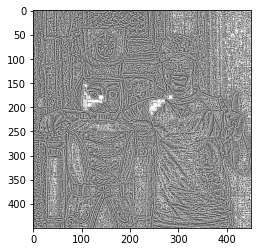

In [18]:
img = plt.imread('Hi.tif')
result = hw2_local_histeq(img, 3, 3)

# Q4

<div dir="rtl">
تابع خواسته شده در سوال چهارم، که تصویر و لوگو را دریافت کرده و لوگو را در لایه ی Lام تصویر جایگذاری میکند.

لازم به ذکر است که برای تک بیتی کردن تصویر از تابع Dither استفاده کرده ام.

از آنجایی که مشخص نشده چه تابعی برای تک بیتی کردن لوگو استفاده شود و موضوع کلاس در مورد پیاده سازی تابع Dither نبوده است، بنده از نمونه ی آماده این تابع استفاده کرده ام.
<div>

In [19]:
def hw2_hide(image, logo, L):

  lst = []
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          lst.append(np.binary_repr(image[i][j] ,width=8))
  bit_planes = np.zeros((8, image.shape[0], image.shape[1]))
  for j in range(0, 8):
    bit_planes[int(7-j)] = (np.array([int(i[j]) for i in lst],dtype = np.uint8) * pow(2,7-j)).reshape(image.shape[0],image.shape[1])
  logo = Dither.dither(logo, 'simple2D', resize=True)
  logo = cv2.resize(logo, (image.shape[0], image.shape[1]), interpolation=cv2.INTER_CUBIC)
  bit_planes[L-1] = logo
  new_img = bit_planes.sum(axis=0)
  return new_img


<div dir="rtl">
فراخوانی تابع مربوط به سوال چهارم:
<div>

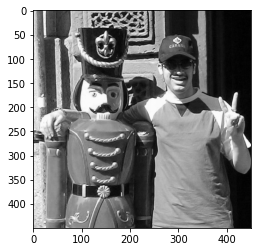

In [20]:
img = plt.imread('Hi.tif')
iut = plt.imread('iut.tif')
out = hw2_hide(img, iut, 1)
plt.imshow(out, cmap='gray')

<div dir="rtl">
محاسبه ی MSE تصویر اصلی و تصویری که لوگو در کم ارزش ترین لایه ی بیتی جایگزین شده است:
<div>

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(img,out)


0.489829213656074

<div dir="rtl">
با تشکر از توجه شما
<div>